In [8]:
import glob, re
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import numpy as np
import pandas as pd
from sklearn import *
from datetime import datetime

import scipy.stats as st
%matplotlib inline
import matplotlib
matplotlib.style.use('ggplot')
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings("ignore")


In [9]:
air_visit = pd.read_csv('../input/air_visit_data.csv')
air_store = pd.read_csv('../input/air_store_info.csv')
hpg_store = pd.read_csv('../input/hpg_store_info.csv')
air_reserve = pd.read_csv('../input/air_reserve.csv')
hpg_reserve = pd.read_csv('../input/hpg_reserve.csv')
store_id = pd.read_csv('../input/store_id_relation.csv')
holiday = pd.read_csv('../input/date_info.csv').rename(columns={'calendar_date':'visit_date'})
sub = pd.read_csv('../input/sample_submission.csv')

In [19]:
#air_store.head(1)
temp2 = air_store.groupby("air_genre_name").count()['air_store_id'].sort_values(ascending=False)
temp2

air_genre_name
Izakaya                         197
Cafe/Sweets                     181
Dining bar                      108
Italian/French                  102
Bar/Cocktail                     79
Japanese food                    63
Other                            27
Yakiniku/Korean food             23
Western food                     16
Okonomiyaki/Monja/Teppanyaki     14
Creative cuisine                 13
Karaoke/Party                     2
International cuisine             2
Asian                             2
Name: air_store_id, dtype: int64

In [20]:
#hpg_store.head(1)
temp3 = hpg_store.groupby("hpg_genre_name").count()['hpg_store_id'].sort_values(ascending=False)
temp3

hpg_genre_name
Japanese style                  1750
International cuisine            700
Creation                         410
Seafood                          339
Grilled meat                     325
Italian                          249
Spain Bar/Italian Bar            229
Chinese general                   91
Japanese food in general          85
Japanese cuisine/Kaiseki          64
Karaoke                           60
Creative Japanese food            60
Shabu-shabu/Sukiyaki              59
Okonomiyaki/Monja/Teppanyaki      44
Party                             40
Korean cuisine                    38
French                            27
Steak/Hamburger/Curry             24
Bistro                            22
Cafe                              16
Sushi                             11
Pasta/Pizza                       10
Bar/Cocktail                       7
Western food                       5
Thai/Vietnamese food               5
Amusement bar                      5
Cantonese food         

## Air Resturant per Genere Name and HPG Resturant per Genere Name

Text(0, 0.5, 'Number Of Resturants By HPG')

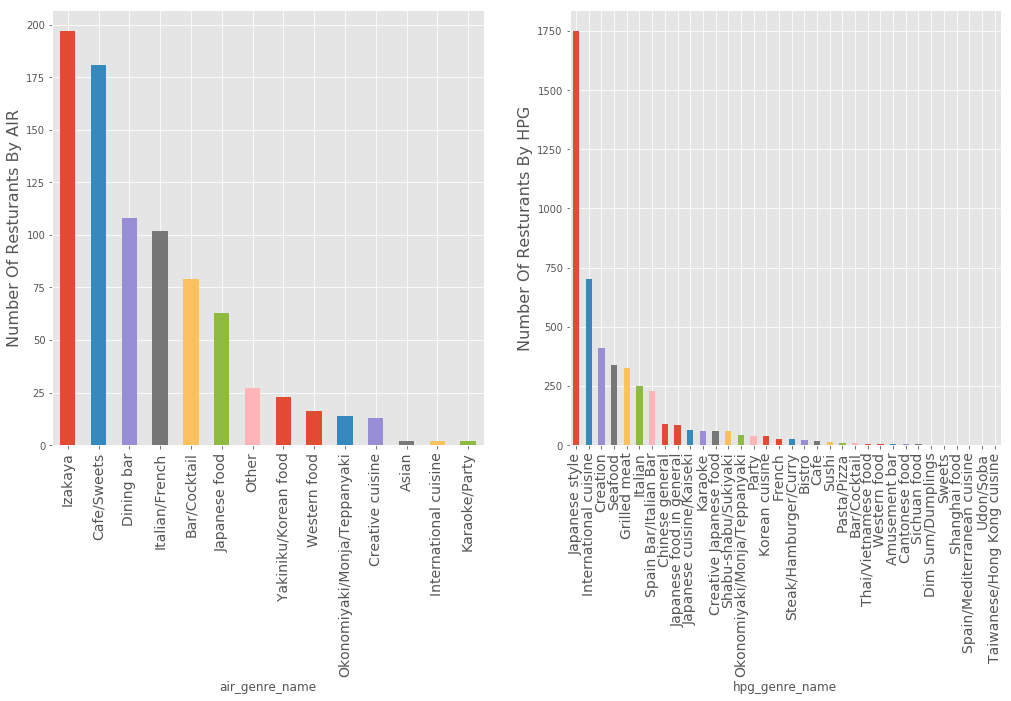

In [18]:

fig = plt.figure(figsize=(17,8))

ax = fig.add_subplot(121)
temp = air_store.groupby("air_genre_name").count()['air_store_id'].sort_values(ascending=False)

temp.plot(kind='bar',width=0.5,ax=ax)
ax.set_xticklabels(temp.sort_values(ascending=False).index,fontsize=14)
plt.ylabel("Number Of Resturants By AIR",fontsize=16)

ax = fig.add_subplot(122)
temp = hpg_store.groupby("hpg_genre_name").count()['hpg_store_id'].sort_values(ascending=False)
temp.plot(kind='bar',width=0.5,ax=ax)
ax.set_xticklabels(temp.sort_values(ascending=False).index,fontsize=14)
plt.ylabel("Number Of Resturants By HPG",fontsize=16)

## Air Resturant AREA NAME and HPG Resturant  AREA NAME

In [22]:
print("Total Number of unique locations (Air): {}".format(len(air_store.
                                                              groupby("air_area_name").
                                                              count())))
print("Total Number of unique locations (HPG): {}".format(len(hpg_store.
                                                              groupby("hpg_area_name").
                                                              count())))

Total Number of unique locations (Air): 103
Total Number of unique locations (HPG): 119


### Air Visits

In [26]:
#air_visit.describe()
air_visit['visit_date']=pd.to_datetime(air_visit['visit_date'])
air_visit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252108 entries, 0 to 252107
Data columns (total 3 columns):
air_store_id    252108 non-null object
visit_date      252108 non-null datetime64[ns]
visitors        252108 non-null int64
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 5.8+ MB


In [38]:
temp4 = air_visit.groupby(['visit_date']).sum()['visitors'].sort_values(ascending=True)
temp4.head()

visit_date
2016-01-01    1033
2016-01-02    1764
2016-01-03    2368
2016-01-18    3274
2016-01-04    3326
Name: visitors, dtype: int64

In [29]:
temp5 = air_visit.groupby(['visit_date']).mean()
temp5.head()

,visitors
visit_date,
2016-01-01,21.520833
2016-01-02,28.000000
2016-01-03,29.234568
2016-01-04,21.184713
2016-01-05,17.000000


In [31]:
error2 = air_visit.groupby(['visit_date']).std()
error2.head()

,visitors
visit_date,
2016-01-01,21.846651
2016-01-02,21.351135
2016-01-03,23.669744
2016-01-04,16.403104
2016-01-05,12.514340


Text(0, 0.5, 'Ave(visitors)')

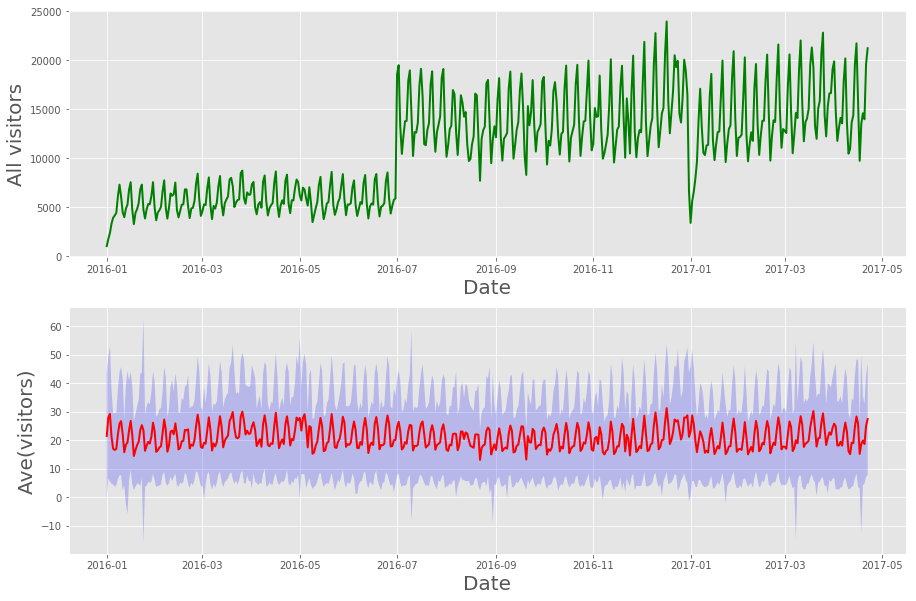

In [37]:
fig = plt.figure(figsize=(15,10))
ax1 = fig.add_subplot(211)

temp = air_visit.groupby(['visit_date']).sum() 
ax1.plot(temp,'green',linewidth=2)
ax1.set_xlabel('Date',fontsize=20)
ax1.set_ylabel('All visitors',fontsize=20)

ax2 = fig.add_subplot(212)
temp = air_visit.groupby(['visit_date']).mean()
ax2.plot(temp.index,temp.values,'red',linewidth=2)
error = air_visit.groupby(['visit_date']).std()
ax2.fill_between(temp.index,(temp.values-error.values).T[0], (temp.values+error.values).T[0],
                facecolor='blue', alpha=0.2)
ax2.set_xlabel('Date',fontsize=20)
ax2.set_ylabel('Ave(visitors)',fontsize=20)

There is a large difference between total visitors before "2016-07" and after "2016-07". However, average number of visitors are similar based on the bottom figure

In [39]:
print("Total Number of Restaurants : {}".format(len(air_visit['air_store_id'].unique())))

Total Number of Restaurants : 829
